# Change Point Detection 

9/12/2022

Change point detection is used to find abrupt changes in time series data. 

Change Point Detection Methods
- Online Method: Detect changes in real-time (Event / Anomaly Detection)
- Offline Methods: Detect changes after all samples have been received (Signal Segmentation)

Time Series Modeling
- Univariate: Series with a single-time dependent variable. Ex: Time / Temperature
- Multivariate: Consists of more than one time-dependent variable and each variable depends not only on its past values but also has some dependency on other variables. Ex: Time, Temp / Cloud Cover / Dew Point / Humidity / Wind


In [20]:
# Baseline code that will be used for the examples.

#Import the data needed
import pandas as pd

#Data of memory utilization from a server experience memory leaks. (Comes from X)
df = pd.read_csv('data/sample_data/m_1939.csv')
df.head()

,date,machine_id,mem_util_percent,label
0,2018-01-01 00:00:00,m_1939,89.000000,Anomaly
1,2018-01-01 00:05:00,m_1939,92.500000,Anomaly
2,2018-01-01 00:10:00,m_1939,91.000000,Anomaly
3,2018-01-01 00:15:00,m_1939,92.000000,Anomaly
4,2018-01-01 00:20:00,m_1939,93.333333,Anomaly


In [21]:
#Convert value to datetime, set to be index
df['date'] = pd.to_datetime(df['date'])
df.set_index(df['date'], inplace = True)

#Timeseries info is set to mem_util_percent
timeSeriesMemUtil = df['mem_util_percent']

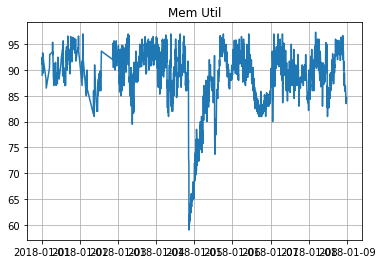

In [22]:
#Display the data
import matplotlib.pyplot as plt

plt.plot(timeSeriesMemUtil)
plt.title('Mem Util')
plt.grid()
plt.show()

In [23]:
#Create a numpy array of the timeseries data.
import numpy as np

tsMemUtilArray = np.array(timeSeriesMemUtil.tolist())
tsMemUtilArray

array([89.        , 92.5       , 91.        , ..., 84.        ,
       84.        , 84.66666667])

## [Ruptures](https://centre-borelli.github.io/ruptures-docs/)

Ruptures is a Python library for off-line change point detection. This package provides methods for the analysis and segmentation of non-stationary signals. Implemented algorithms include exact and approximate detection for various parametric and non-parametric models. ruptures focuses on ease of use by providing a well-documented and consistent interface. In addition, thanks to its modular structure, different algorithms and models can be connected and extended within this package.

Time Complexity: N/A

Pros: -  
Cons: Specifying the number of change points.

#### Algorithm: 

- 
-


#### References:
- C. Truong, L. Oudre, N. Vayatis. Selective review of offline change point detection methods. Signal Processing, 167:107299, 2020. [PDF](http://www.laurentoudre.fr/publis/TOG-SP-19.pdf)


## Ruptures Package

In [24]:
import ruptures as rpt

n_breaks = 3

model = rpt.Dynp(model="l1")
model.fit(tsMemUtilArray)
breaks = model.predict(n_bkps=n_breaks-1)

In [25]:
breaks_rpt = []
for i in breaks:
    breaks_rpt.append(timeSeriesMemUtil.index[i-1])
breaks_rpt = pd.to_datetime(breaks_rpt)
breaks_rpt

DatetimeIndex(['2018-01-04 20:25:00', '2018-01-05 05:30:00',
               '2018-01-08 23:55:00'],
              dtype='datetime64[ns]', freq=None)

2018-01-04 20:25:00
2018-01-05 05:30:00
2018-01-08 23:55:00


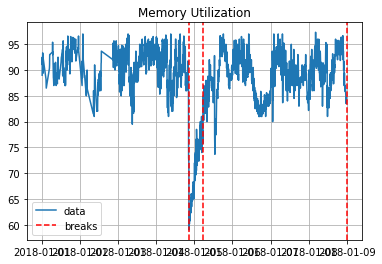

In [28]:
plt.plot(timeSeriesMemUtil, label='data')
plt.title('Memory Utilization')
print_legend = True
for i in breaks_rpt:
    print(i)
    if print_legend:
        plt.axvline(i, color='red',linestyle='dashed', label='breaks')
        print_legend = False
    else:
        plt.axvline(i, color='red',linestyle='dashed')
plt.grid()
plt.legend()
plt.show()

## [Prophet (Facebook)](https://facebook.github.io/prophet/docs/trend_changepoints.html#automatic-changepoint-detection-in-prophet)

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Time Complexity: N/A

Pros: -  
Cons: -

#### Algorithm: 

- Determine a number of potential change points by uniformly placing $X$ points, in first $Y\%$ of the time series.  
![Uniformal Change Points](inc/img/trend_changepoints_4_0.png)
- Apply a sparse prior on the magnitudes of the rate changes (L1 regularization).  
![L1 Regularization](inc/img/trend_changepoints_6_0.png)



#### Additional Information:
- https://www.microprediction.com/blog/prophet

#### References:
- https://facebook.github.io/prophet/docs/trend_changepoints.html#adjusting-trend-flexibility
- https://facebook.github.io/prophet/


### Prophet (Facebook) Example

In [24]:
from prophet import Prophet

In [25]:
#Making a copy of the dataframe to rename the columns to the required name columns ds, y
newdf = df[['date','mem_util_percent']].copy()
newdf.rename(columns = {'date':'ds', 'mem_util_percent': 'y'}, inplace=True)

newdf

,ds,y
date,,
2018-01-01 00:00:00,2018-01-01 00:00:00,89.000000
2018-01-01 00:05:00,2018-01-01 00:05:00,92.500000
2018-01-01 00:10:00,2018-01-01 00:10:00,91.000000
2018-01-01 00:15:00,2018-01-01 00:15:00,92.000000
2018-01-01 00:20:00,2018-01-01 00:20:00,93.333333
...,...,...
2018-01-08 23:35:00,2018-01-08 23:35:00,84.666667
2018-01-08 23:40:00,2018-01-08 23:40:00,83.500000
2018-01-08 23:45:00,2018-01-08 23:45:00,84.000000


In [27]:
# Defaults:
# 25 change points in the first 80% of the time series.
# changepoint_range=<0.0-1.0> , specifies the percent of time series data you want to apply change points to.
# Uniformly distributed change points.


m = Prophet(changepoint_range=0.8, n_changepoints=6)
m.fit(newdf)

14:28:43 - cmdstanpy - INFO - Chain [1] start processing
14:28:43 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
m.changepoints

257    2018-01-02 23:10:00
513    2018-01-03 21:35:00
770    2018-01-04 20:00:00
1027   2018-01-05 18:15:00
1283   2018-01-06 16:20:00
1540   2018-01-07 14:20:00
Name: ds, dtype: datetime64[ns]

In [29]:
#Set timestamp to be actual datatime type
newdf['ds'] = pd.to_datetime(newdf['ds'])


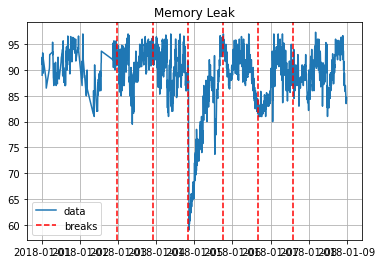

In [30]:
plt.plot(newdf['ds'], newdf['y'], label='data')
plt.title('Memory Leak')
print_legend = True
for i in m.changepoints:
    if print_legend:
            plt.axvline(i, color='red',linestyle='dashed', label='breaks')
            print_legend = False
    else:
            plt.axvline(i, color='red',linestyle='dashed')
plt.grid()
plt.legend()
plt.show()

## [Roerich](https://github.com/HSE-LAMBDA/roerich)

Roerich is a python library for online and offline change point detection for time series analysis, signal processing, and segmentation.

Time Complexity: 

Pros: 
Cons: 

#### Algorithm: 



#### Additional Information:
- https://github.com/HSE-LAMBDA/roerich
- (Docs) - https://hse-lambda.github.io/roerich/
- https://tiao.io/post/density-ratio-estimation-for-kl-divergence-minimization-between-implicit-distributions/
- https://arxiv.org/abs/2111.11010

#### References:
-  Mikhail Hushchyn and Andrey Ustyuzhanin. “Generalization of Change-Point Detection in Time Series Data Based on Direct Density Ratio Estimation.” J. Comput. Sci. 53 (2021): 101385.
-  Mikhail Hushchyn, Kenenbek Arzymatov and Denis Derkach. “Online Neural Networks for Change-Point Detection.” ArXiv abs/2010.01388 (2020).




In [8]:
import roerich
from roerich.algorithms import ChangePointDetectionClassifier

In [11]:
# generate time series


# detection
cpd = ChangePointDetectionClassifier()
score, cps_pred = cpd.predict(tsMemUtilArray)
cps_true = [1]

# visualization
roerich.display(tsMemUtilArray, cps_true, score=None, cps_pred=None)

IndexError: tuple index out of range

## [Greykite (Linkedin)](https://github.com/linkedin/greykite)


Greykite is a forecast library developed by LinkedIn. Its flagship algorithm, Silverkite, provides interpretable, fast, and highly flexible univariate forecasts that capture effects such as time-varying growth and seasonality, autocorrelation, holidays, and regressors. The Silverkite model offers pre-tuned templates (i.e. parameter configs) appropriate for different forecast frequencies, horizons, and data patterns. The library facilitates exploratory data analysis (EDA), end-to-end forecasting, model tuning, and benchmarking.

Time Complexity: 

Pros: -  
Cons: Requires older Python versions (3.7.7, 3.8.6), will fail on anything newer.

#### Algorithm: 

- x

#### Additional Information:
- https://github.com/linkedin/greykite
- https://engineering.linkedin.com/blog/2021/greykite--a-flexible--intuitive--and-fast-forecasting-library

#### References:
- x




## [Bayesian](https://github.com/hildensia/bayesian_changepoint_detection)


Computes the probability of changepoints in a time series.

Time Complexity: $O(n^2)$

Pros: -  
Cons: Zero documentation.

#### Algorithm:
Paul Fearnhead, Exact and Efficient Bayesian Inference for Multiple Changepoint problems, Statistics and computing 16.2 (2006), pp. 203--213
- Calculate the prior of how probable it is to have two successive changepoints with the distance $t$. 
- Create a model of the likelihood of data in a sequence $[s,t]$, given that in this sequence there is no change point.



#### Additional Information:
- https://github.com/hildensia/bayesian_changepoint_detection


#### References:
- Paul Fearnhead, Exact and Efficient Bayesian Inference for Multiple Changepoint problems, Statistics and computing 16.2 (2006), pp. 203--213
- Ryan P. Adams, David J.C. MacKay, Bayesian Online Changepoint Detection, arXiv 0710.3742 (2007)
- Xuan Xiang, Kevin Murphy, Modeling Changing Dependency Structure in Multivariate Time Series, ICML (2007), pp. 1055--1062



In [23]:
## 

from bayesian_changepoint_detection.generate_data import generate_normal_time_series
partition, data = generate_normal_time_series(7, 50, 200)

In [24]:
from bayesian_changepoint_detection.priors import const_prior
from functools import partial

## const_prior assumes a uniform prior over the length of sequences
prior_function = partial(const_prior, p=1/(len(tsMemUtilArray) + 1))

tsMemUtilArray

array([89.        , 92.5       , 91.        , ..., 84.        ,
       84.        , 84.66666667])

In [20]:
from bayesian_changepoint_detection.bayesian_models import offline_changepoint_detection
import bayesian_changepoint_detection.offline_likelihoods as offline_ll

Q, P, Pcp = offline_changepoint_detection(tsMemUtilArray, prior_function ,offline_ll.StudentT(),truncate=-40)

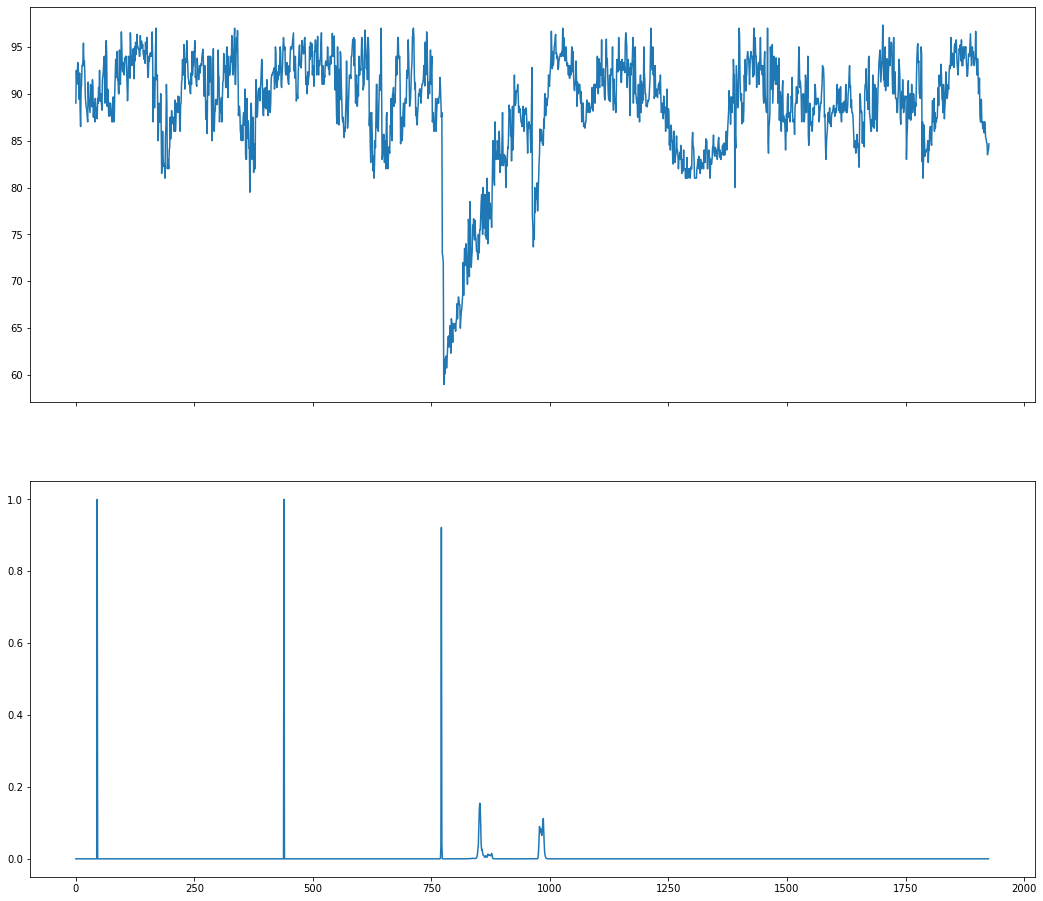

In [22]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(2, figsize=[18, 16], sharex=True)
ax[0].plot(tsMemUtilArray[:])
ax[1].plot(np.exp(Pcp).sum(0))

## [Jenkspy (Fisher-Jenks Algorithm)](https://github.com/mthh/jenkspy)

This method is also known as Jenks Natural Breaks (1977, Jenks), it determines optimal class boundaries. Like K-means it assigns data to one of the K groups, with best minimized. Have to select K before running the algorithm. Relies on the concept of Natural Breaks, which is the best way to split of ranges, tries to group like ranges together, and minimizes the variation.

Time Complexity: $O(k×n^2)$

Pros: Good for one-dimensional data.  
Cons: Have to specify the number of clusters. Doesn't really work with time-series data.

#### Algorithm: 
1. Calculate sum of squared deviations for array mean (SDAM).  
$sum\; of\; squares (SS) = \sum{(X - \bar{X})}^2$  
$values = 4, 5, 9, 10$  
$mean = \frac{(4 + 5 + 9 + 10)}{4} = 7$  
$sum\; of\; squared\; deviations (SDAM) = (4-7)^2 + (5-7)^2 + (9-7)^2 + (10-7)^2 = 9 + 4 + 4 + 9 = 26$  

2. Calculate sum of squared deviations for class means (SDCM).  
    - For [4][5,9,10]  
    $sum = (4-4)^2+(5-8)^2+(9-8)^2+(10-8)^2 = 0 + 9 + 1 + 4 = 14$  
    
    - For [4,5][9,10]  
    $sum = (4-4.5)^2+(5-4.5)^2+(9-9.5)^2+(10-9.5)^2 = 0.25 + 0.25 + 0.25 + 0.25 = 1$ 

    - For [4,5,9][10]  
    $sum = (4-6)^2+(5-6)^2+(9-6)^2+(10-10)^2 = 4 + 1 + 9 + 0 = 14$

3. Calculate goodness of variance fit (GVF). Range bad fit [0 - 1] perfect fit.  
$ GVF = \frac{(SDAM - SDCM)}{SDAM} $
    - [4,5][9,10]  
    $ GVF = \frac{(26 - 1)}{26} = \frac{25}{26} = 0.96 $
    
    - [4][5,9,10] or [4,5,9][10]  
    $ GVF = \frac{(26 - 14)}{26} = \frac{12}{26} = 0.46 $


#### Additional Information:
- https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization
- http://wiki.gis.com/wiki/index.php/Jenks_Natural_Breaks_Classification
- https://www.geodms.nl/Fisher%27s_Natural_Breaks_Classification_complexity_proof
- (Plugin) https://pypi.org/project/jenkspy/ | https://github.com/mthh/jenkspy 
- (Tutorial) https://pbpython.com/natural-breaks.html

#### References:
- Optimal Data Classification for Choropleth Maps, George F. Jenks, 1977

### Jenkspy (Fisher-Jenks Algorithm) Example

In [39]:
import jenkspy


####################
### jenks_breaks ###
####################

# jenks_breaks(<list / tuple / array.array / numpy.ndarray of integers or floats>, n_classes=<number of expected classes>)
# RETURNS: a list of values that correspond to the limits of the classes 
# (starting with the minimum value of the series - the lower bound of the first class - and ending with its maximum value - the upper bound of the last class).

breaks = jenkspy.jenks_breaks(tsMemUtilArray, n_classes=3)
breaks

[59.0, 78.33333333333333, 89.25, 97.33333333333331]

In [41]:
#Finding all the data points that align with the break points.

breaks_jkp = []
for v in breaks:
    idx = timeSeriesMemUtil.index[timeSeriesMemUtil == v]
    breaks_jkp.append(idx)
breaks_jkp

[DatetimeIndex(['2018-01-04 20:35:00', '2018-01-04 20:40:00'], dtype='datetime64[ns]', name='date', freq=None),
 DatetimeIndex(['2018-01-05 05:05:00'], dtype='datetime64[ns]', name='date', freq=None),
 DatetimeIndex(['2018-01-01 17:30:00', '2018-01-03 10:45:00',
                '2018-01-06 09:50:00', '2018-01-07 00:45:00',
                '2018-01-07 02:25:00', '2018-01-08 01:40:00',
                '2018-01-08 13:40:00'],
               dtype='datetime64[ns]', name='date', freq=None),
 DatetimeIndex(['2018-01-08 04:25:00'], dtype='datetime64[ns]', name='date', freq=None)]

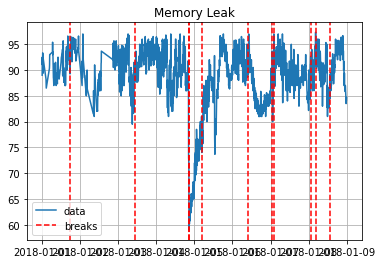

In [44]:
plt.plot(timeSeriesMemUtil, label='data')
plt.title('Memory Leak')
print_legend = True
for i in breaks_jkp:
        for x in i:
                if print_legend:
                        plt.axvline(x, color='red',linestyle='dashed', label='breaks')
                        print_legend = False
                else:
                        plt.axvline(x, color='red',linestyle='dashed')
plt.grid()
plt.legend()
plt.show()

## Overall Package Reference

- [SDT](https://github.com/schuetzgroup/sdt-python): Used for analysis of fluorescence microscopy data
- [TSFresh](https://github.com/blue-yonder/tsfresh): systematic time-series feature extraction by combining established algorithms from statistics, time-series analysis, signal processing, and nonlinear dynamics with a robust feature selection algorithm. In this context, the term time-series is interpreted in the broadest possible sense, such that any types of sampled data or even event sequences can be characterised.
- [Darts](https://unit8co.github.io/darts/): easy manipulation and forecasting of time series. It contains a variety of models, from classics such as ARIMA to deep neural networks. The models can all be used in the same way, using fit() and predict() functions, similar to scikit-learn. The library also makes it easy to backtest models, combine the predictions of several models, and take external data into account. Darts supports both univariate and multivariate time series and models. The ML-based models can be trained on potentially large datasets containing multiple time series, and some of the models offer a rich support for probabilistic forecasting.
- [AutoTS](https://github.com/winedarksea/AutoTS): AutoTS is a time series package for Python designed for rapidly deploying high-accuracy forecasts at scale.

# Overall References
- https://medium.com/dataman-in-ai/finding-the-change-points-in-a-time-series-95a308207012
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5464762/

##  Luminaire 
https://zillow.github.io/luminaire/tutorial/dataprofiling.html

## Kats - Facebook Change Point Detection

https://facebookresearch.github.io/Kats/
https://github.com/facebookresearch/Kats/blob/main/tutorials/kats_202_detection.ipynb

## SciKit Learn Multi-Flow 

https://scikit-multiflow.readthedocs.io/en/stable/api/api.html#module-skmultiflow.drift_detection

## Tensorflow

https://www.tensorflow.org/probability/examples/Multiple_changepoint_detection_and_Bayesian_model_selection

## Sktime

https://www.sktime.org/en/stable/related_software.html